In [2]:
# -*- coding: utf-8 -*-
# <nbformat>3.0</nbformat>

# <codecell>

# coding: utf-8
%matplotlib inline
import matplotlib
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
from matplotlib import rc ## desnec?essário
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams.update({'font.size': 22})


'''
Method of lines - Intraguild Predation + Diffusion
Quimiostatic growth for resource
Already using adimensionlization
'''

#Parametros

d_1 = 5
d_2 = 5
d_r = 5
m = 1.5
mu = 20
gamma = 0.1
alpha = 0.5
beta = 5 #Bifurcações ao aumentar o beta!
phi = 1.0

#Discretização
M = 101 #espaço
N = 2000 #tempo
Tmax = 200.0

In [3]:
# -------------------- Funcional Response - IGP

'''
f_R(R,C1,C2) = mu - phi*R - C1*R - C2*R 

f_C1(R,C1,C2) = C1*R - C1 - alpha*C1*C2 

f_C2(R,C1,C2) = m*gamma*C2*R - m*C2 + beta*alpha*C1*C2
'''

def f_R(R, C1, C2):
    return mu - phi*R - C1*R - C2*R 

def f_C1(R, C1, C2):
    return C1*R - C1 - alpha*C1*C2 

def f_C2(R, C1, C2):
    return m*gamma*C2*R - m*C2 + beta*alpha*C1*C2

In [4]:
#inicialize as populações
def init(M):
    
    #Populações iniciais - sino
    x = np.linspace(0,np.pi,M)
    
    R0 = 1.0*np.sin(x)
    C10 = 1.0*np.sin(x)
    C20 = 1.0*np.sin(x)
    
    del x
    
    '''
    #Populações iniciais - step function
    
    R0 = np.zeros(M)
    C10 = np.zeros(M)
    C20 = np.zeros(M)
    
    R_0 = 1.0
    C1_0 = 1.0
    C2_0 = 1.0
    for i in range(0,M):
        if i >= 0.3*M and i < 0.7*M:
            R0[i] = R_0
            C10[i] = C1_0
            C20[i] = C2_0
            
    '''
    
    return R0,C10,C20

In [5]:
def ddt(y,t):
    
    #discret
    h = np.pi/(M-1)
    
    
    #c.contorno (Dirichlet)
    
    dRdt = np.zeros(M)
    dC1dt = np.zeros(M)
    dC2dt = np.zeros(M)
    
    
    R = y[0:M]
    C1 = y[M:2*M]
    C2 = y[2*M:]
    
    R[0] = 0
    C1[0] = 0
    C2[0] = 0
    R[-1] = 0
    C1[-1] = 0
    C2[-1] = 0
    
    dRdt[1:M-1] = d_r*(R[2:M] - 2*R[1:M-1] + R[0:M-2])/(h**2) + f_R(R[1:M-1],C1[1:M-1],C2[1:M-1])
    dC1dt[1:M-1] = d_1*(C1[2:M] - 2*C1[1:M-1] + C1[0:M-2])/(h**2) + f_C1(R[1:M-1],C1[1:M-1],C2[1:M-1])
    dC2dt[1:M-1] = d_2*(C2[2:M] - 2*C2[1:M-1] + C2[0:M-2])/(h**2) + f_C2(R[1:M-1],C1[1:M-1],C2[1:M-1])
    
    '''
    
    
    #c. contorno (Neumann) - Lembre de mudar M para M+2!
    
    dRdt = np.zeros(M+2)
    dC1dt = np.zeros(M+2)
    dC2dt = np.zeros(M+2)
    
    R = y[0:M+2]
    C1 = y[M+2:2*(M+2)]
    C2 = y[2*(M+2):]
    
    R[0] = R[1]
    C1[0] = C1[1]
    C2[0] = C2[1]
    R[-1] = R[-2]
    C1[-1] = C1[-2]
    C2[-1] = C2[-2]
    
    for m in range(1,M+1):
        
        dRdt[m] = d_r*(R[m+1] - 2*R[m] + R[m-1])/(h**2) #+ f_R(R[1:M-1],C1[1:M-1],C2[1:M-1])
        dC1dt[m] = d_1*(C1[m+1] - 2*C1[m] + C1[m-1])/(h**2) #+ f_C1(R[1:M-1],C1[1:M-1],C2[1:M-1])
        dC2dt[m] = d_2*(C2[m+1] - 2*C2[m] + C2[m-1])/(h**2) #+ f_C2(R[1:M-1],C1[1:M-1],C2[1:M-1])
    '''
    '''
       
    #c. contorno: (Neumann para R e Dirichlet p/ Cs) - Lembre de mudar o grid de M para M+2!
    
    dRdt = np.zeros(M+2) #Os ddts nunca são calculados nas extremidades? Posso deixar como zero?
    dC1dt = np.zeros(M+2)
    dC2dt = np.zeros(M+2)
    
    R = y[0:M+2]
    C1 = y[M+2:2*(M+2)]
    C2 = y[2*(M+2):]
    
    R[0] = R[1]
    C1[1] = 0
    C2[1] = 0
    
    R[-1] = R[-2]
    C1[-2] = 0
    C2[-2] = 0
            
    dRdt[1:M+1] = d_r*(R[2:M+2] - 2*R[1:M+1] + R[0:M])/(h**2) + f_R(R[1:M+1],C1[1:M+1],C2[1:M+1])    
        
    dC1dt[2:M] = d_1*(C1[3:M+1] - 2*C1[2:M] + C1[1:M-1])/(h**2) + f_C1(R[2:M],C1[2:M],C2[2:M])
    dC2dt[2:M] = d_2*(C2[3:M+1] - 2*C2[2:M] + C2[1:M-1])/(h**2) + f_C2(R[2:M],C1[2:M],C2[2:M])
    '''
    
    return np.r_[dRdt,dC1dt,dC2dt]

In [6]:
#Funções que calculam os mu_i, deduzidos pelo MÉTODO VARIACIONAL, R, C1, C2 em Dirichlet
def mu_1():
    #R Difunde: R = B1*sin(x) 
    if d_r > 0:
        return 3*(np.pi**2)*(phi+d_r)*(1+d_1)/32

def mu_2():
    #R Difunde: R = B1*sin(x) 
    if d_r > 0:
        return (3*np.pi**2)*(m + d_2 - m*gamma*(1+d_1))*(1+d_1)/(32*beta*alpha) + (3*np.pi**2)*(phi+d_r)*(1+d_1)/32
        #return (3*np.pi**2)*(1 + d_1)*(d_2 + m + beta*alpha*(phi + d_r) - m*gamma*(1+d_1))/(32*beta*alpha)

def mu_3():
    #R Difunde: R = B1*sin(x) 
    if d_r > 0:
        return (3*np.pi**2)*(m + d_2)*((m+d_2)/(m*gamma) - 1 - d_1)/(32*m*gamma*alpha) + (3*np.pi**2)*(m + d_2)*(phi+d_r)/(32*m*gamma)

In [22]:
#Integre um caso aqui
d_r = 5
d_1 = 8
d_2 = 5
mu = 5
t = np.linspace(0,Tmax,N)
m = 1.0
gamma = 0.5
alpha = 1
beta = 1
phi = 1.0
#pop inicial
R0,C10,C20 = init(M)
y0 = np.r_[R0,C10,C20]
sol = scipy.integrate.odeint(ddt,y0,t) 
sol = np.array(sol)

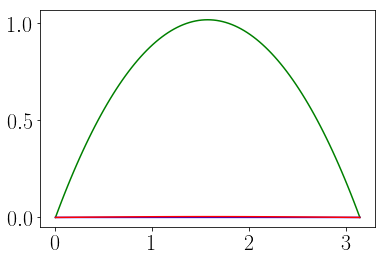

In [23]:
#plot no espaço]

d_r = 1
d_1 = 1
d_2 = 1
mu = 20
t = np.linspace(0,Tmax,N)
m = 1.0
gamma = 0.5
alpha = 1
beta = 1
phi = 1.0

##sol = np.load('Method_Of_LinesIGP_dR=%.3f,d1=%.3f,d2=%.3f,mu=%.3f,alpha=%.3f,gamma=%.3f,beta=%.f,phi=%.3f,m=%.3f.npy'
            #% (d_r,d_1,d_2,mu,alpha,gamma,beta,phi,m))

R = np.transpose(sol[:,0:M])
C1 = np.transpose(sol[:,M:2*(M)])
C2 = np.transpose(sol[:,2*(M):])
x = np.linspace(0,np.pi,M)
plt.plot(x,R[0:M,10],color = 'green')
plt.plot(x,C1[0:M,10], color = 'blue')
plt.plot(x,C2[0:M,10],color = 'red')
#plt.axis([0,np.pi,0,10])

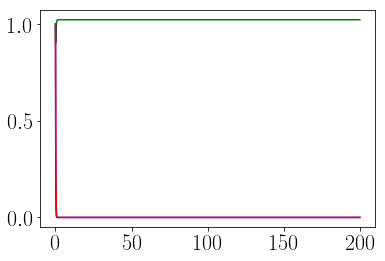

In [24]:
#centro do patch no tempo (ver se a população está constante mesmo)

d_r = 0
d_1 = 1
d_2 = 1
mu = 42
t = np.linspace(0,Tmax,N)
m = 1.0
gamma = 0.5
alpha = 1
beta = 1
phi = 1.0

#sol = np.load('Method_Of_LinesIGP_dR=%.3f,d1=%.3f,d2=%.3f,mu=%.3f,alpha=%.3f,gamma=%.3f,beta=%.f,phi=%.3f,m=%.3f.npy'
            #% (d_r,d_1,d_2,mu,alpha,gamma,beta,phi,m))

R = np.transpose(sol[:,0:M])
C1 = np.transpose(sol[:,M:2*M])
C2 = np.transpose(sol[:,2*M:])
plt.plot(t,R[M/2,:],color = 'green')
plt.plot(t,C1[M/2,:],color = 'blue')
plt.plot(t,C2[M/2,:],color = 'red')

In [20]:
#Faça para vários dR, d1, d2, mu
DR = [1]
D1 = [1]
D2 = [1]
MU = [0.0 + i for i in range(0,140)]
t = np.linspace(0,Tmax,N)
m = 1.0
gamma = 0.5
alpha = 1
beta = 1
phi = 1.0
#pop inicial
R0,C10,C20 = init(M)
y0 = np.r_[R0,C10,C20]
for d_r in DR:
    print("d_r = " + str(d_r))
    for d_1 in D1:
        print("d_1 = " + str(d_1))
        for d_2 in D2:
            print("d_2 = " + str(d_2))
            for mu in MU:
                print("mu = " + str(mu))
                sol = scipy.integrate.odeint(ddt,y0,t)
                sol = np.array(sol)
                np.save('Method_Of_LinesIGP_dR=%.3f,d1=%.3f,d2=%.3f,mu=%.3f,alpha=%.3f,gamma=%.3f,beta=%.f,phi=%.3f,m=%.3f'
                        % (d_r,d_1,d_2,mu,alpha,gamma,beta,phi,m),sol)

d_r = 1
d_1 = 1
d_2 = 1
mu = 0.0
mu = 1.0
mu = 2.0
mu = 3.0
mu = 4.0
mu = 5.0
mu = 6.0
mu = 7.0
mu = 8.0
mu = 9.0
mu = 10.0
mu = 11.0
mu = 12.0
mu = 13.0
mu = 14.0
mu = 15.0
mu = 16.0
mu = 17.0
mu = 18.0
mu = 19.0
mu = 20.0
mu = 21.0
mu = 22.0
mu = 23.0
mu = 24.0
mu = 25.0
mu = 26.0
mu = 27.0
mu = 28.0
mu = 29.0
mu = 30.0
mu = 31.0
mu = 32.0
mu = 33.0
mu = 34.0
mu = 35.0
mu = 36.0
mu = 37.0
mu = 38.0
mu = 39.0
mu = 40.0
mu = 41.0
mu = 42.0
mu = 43.0
mu = 44.0
mu = 45.0
mu = 46.0
mu = 47.0
mu = 48.0
mu = 49.0
mu = 50.0
mu = 51.0
mu = 52.0
mu = 53.0
mu = 54.0
mu = 55.0
mu = 56.0
mu = 57.0
mu = 58.0
mu = 59.0
mu = 60.0
mu = 61.0
mu = 62.0
mu = 63.0
mu = 64.0
mu = 65.0
mu = 66.0
mu = 67.0
mu = 68.0
mu = 69.0
mu = 70.0
mu = 71.0
mu = 72.0
mu = 73.0
mu = 74.0
mu = 75.0
mu = 76.0
mu = 77.0
mu = 78.0
mu = 79.0
mu = 80.0
mu = 81.0
mu = 82.0
mu = 83.0
mu = 84.0
mu = 85.0
mu = 86.0
mu = 87.0
mu = 88.0
mu = 89.0
mu = 90.0
mu = 91.0
mu = 92.0
mu = 93.0
mu = 94.0
mu = 95.0
mu = 96.0
mu = 97.0
mu = 9

(33.30991485367659, 49.96487228051488, 133.23965941470635)


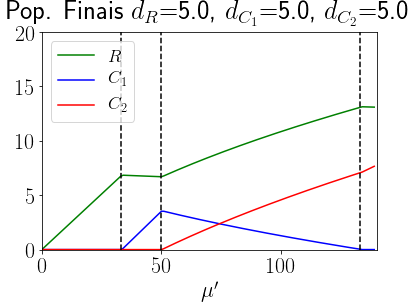

In [7]:
#Imprima a população final
DR = [5]
D1 = [5]
D2 = [5]
MU = [0.0 + i for i in range(0,140)]
m = 1.0
gamma = 0.5
alpha = 1
beta = 1
phi = 1.0

Rfinal = []
C1final = []
C2final = []
t = np.linspace(0,Tmax,N)
for d_r in DR:
    for d_1 in D1:
        for d_2 in D2:
            for mu in MU:
                sol = np.load('Method_Of_LinesIGP_dR=%.3f,d1=%.3f,d2=%.3f,mu=%.3f,alpha=%.3f,gamma=%.3f,beta=%.f,phi=%.3f,m=%.3f.npy'
                              % (d_r,d_1,d_2,mu,alpha,gamma,beta,phi,m))
                R = np.transpose(sol[:,0:M])
                C1 = np.transpose(sol[:,M:2*M])
                C2 = np.transpose(sol[:,2*M:])
                Rfinal.append(R[M/2,-1])
                C1final.append(C1[M/2,-1])
                C2final.append(C2[M/2,-1])

plt.plot(MU,Rfinal,color = 'green', label = r'$R$')
plt.plot(MU,C1final,color = 'blue', label = r'$C_1$')
plt.plot(MU,C2final,color = 'red', label = r'$C_2$')
plt.xlabel(r"$\mu'$")
plt.legend(loc = 'upper left', prop={'size': 18})
plt.title(r'Pop. Finais $d_R$=%.1f, $d_{C_1}$=%.1f, $d_{C_2}$=%.1f' % (d_r,d_1,d_2))
plt.axis([0,140,0,20])
plt.axvline(x=mu_1(), color='black', linestyle='--')
plt.axvline(x=mu_2(), color='black', linestyle='--')
plt.axvline(x=mu_3(), color='black', linestyle='--')
print (mu_1(),mu_2(),mu_3())
plt.savefig('Method_Of_LinesIGP_dR=%.3f,d1=%.3f,d2=%.3f,mu=%.3f,alpha=%.3f,gamma=%.3f,beta=%.f,phi=%.3f,m=%.3f.png'
                              % (d_r,d_1,d_2,mu,alpha,gamma,beta,phi,m))

# R = np.transpose(sol[:,0:M]) np.shape(R)

In [21]:
d_r = 5
d_1 = 36
d_2 = 5
m = 1.0
gamma = 0.5
alpha = 1
beta = 1
phi = 1.0
print (mu_1(),mu_2(),mu_3())
print (1+2*d_2)
print (4+4*d_2+d_r)

(205.41114159767227, -222.5287367308116, -210.962794073285)
11
29


In [91]:
#Gera os dados para fazer o gráfico L x mu
#L' = sqrt(m1)*(L/pi)
Nl = 50 #Número de pontos de L (0.5 ~ 2 para esses param)
Nmu = 50 #Número de pontos de MU (0 ~ 30 para esses param)
L = [0.5 + 0.03*j for j in range(0,Nl)]
MU = [0.0 + 0.6*i for i in range(0,Nmu)]
t = np.linspace(0,Tmax,N)
m = 1.0
gamma = 0.5
alpha = 1
beta = 1
phi = 1.0
#pop inicial
R0,C10,C20 = init(M)
y0 = np.r_[R0,C10,C20]
for l in L:
    d_1 = 5/(l**2)
    d_2 = 5/(l**2)
    d_r = 1/(l**2)
    print("l = " + str(l))
    for mu in MU:
        print("mu = " + str(mu))
        sol = scipy.integrate.odeint(ddt,y0,t)
        sol = np.array(sol)
        np.save('Method_Of_LinesIGP_dR=%.3f,d1=%.3f,d2=%.3f,mu=%.3f,alpha=%.3f,gamma=%.3f,beta=%.f,phi=%.3f,m=%.3f'
                % (d_r,d_1,d_2,mu,alpha,gamma,beta,phi,m),sol)

l = 0.5
mu = 0.0
mu = 0.6
mu = 1.2
mu = 1.8
mu = 2.4
mu = 3.0
mu = 3.6
mu = 4.2
mu = 4.8
mu = 5.4
mu = 6.0
mu = 6.6
mu = 7.2
mu = 7.8
mu = 8.4
mu = 9.0
mu = 9.6
mu = 10.2
mu = 10.8
mu = 11.4
mu = 12.0
mu = 12.6
mu = 13.2
mu = 13.8
mu = 14.4
mu = 15.0
mu = 15.6
mu = 16.2
mu = 16.8
mu = 17.4
mu = 18.0
mu = 18.6
mu = 19.2
mu = 19.8
mu = 20.4
mu = 21.0
mu = 21.6
mu = 22.2
mu = 22.8
mu = 23.4
mu = 24.0
mu = 24.6
mu = 25.2
mu = 25.8
mu = 26.4
mu = 27.0
mu = 27.6
mu = 28.2
mu = 28.8
mu = 29.4
l = 0.53
mu = 0.0
mu = 0.6
mu = 1.2
mu = 1.8
mu = 2.4
mu = 3.0
mu = 3.6
mu = 4.2
mu = 4.8
mu = 5.4
mu = 6.0
mu = 6.6
mu = 7.2
mu = 7.8
mu = 8.4
mu = 9.0
mu = 9.6
mu = 10.2
mu = 10.8
mu = 11.4
mu = 12.0
mu = 12.6
mu = 13.2
mu = 13.8
mu = 14.4
mu = 15.0
mu = 15.6
mu = 16.2
mu = 16.8
mu = 17.4
mu = 18.0
mu = 18.6
mu = 19.2
mu = 19.8
mu = 20.4
mu = 21.0
mu = 21.6
mu = 22.2
mu = 22.8
mu = 23.4
mu = 24.0
mu = 24.6
mu = 25.2
mu = 25.8
mu = 26.4
mu = 27.0
mu = 27.6
mu = 28.2
mu = 28.8
mu = 29.4
l = 0.56
mu = 0.0

mu = 20.4
mu = 21.0
mu = 21.6
mu = 22.2
mu = 22.8
mu = 23.4
mu = 24.0
mu = 24.6
mu = 25.2
mu = 25.8
mu = 26.4
mu = 27.0
mu = 27.6
mu = 28.2
mu = 28.8
mu = 29.4
l = 1.01
mu = 0.0
mu = 0.6
mu = 1.2
mu = 1.8
mu = 2.4
mu = 3.0
mu = 3.6
mu = 4.2
mu = 4.8
mu = 5.4
mu = 6.0
mu = 6.6
mu = 7.2
mu = 7.8
mu = 8.4
mu = 9.0
mu = 9.6
mu = 10.2
mu = 10.8
mu = 11.4
mu = 12.0
mu = 12.6
mu = 13.2
mu = 13.8
mu = 14.4
mu = 15.0
mu = 15.6
mu = 16.2
mu = 16.8
mu = 17.4
mu = 18.0
mu = 18.6
mu = 19.2
mu = 19.8
mu = 20.4
mu = 21.0
mu = 21.6
mu = 22.2
mu = 22.8
mu = 23.4
mu = 24.0
mu = 24.6
mu = 25.2
mu = 25.8
mu = 26.4
mu = 27.0
mu = 27.6
mu = 28.2
mu = 28.8
mu = 29.4
l = 1.04
mu = 0.0
mu = 0.6
mu = 1.2
mu = 1.8
mu = 2.4
mu = 3.0
mu = 3.6
mu = 4.2
mu = 4.8
mu = 5.4
mu = 6.0
mu = 6.6
mu = 7.2
mu = 7.8
mu = 8.4
mu = 9.0
mu = 9.6
mu = 10.2
mu = 10.8
mu = 11.4
mu = 12.0
mu = 12.6
mu = 13.2
mu = 13.8
mu = 14.4
mu = 15.0
mu = 15.6
mu = 16.2
mu = 16.8
mu = 17.4
mu = 18.0
mu = 18.6
mu = 19.2
mu = 19.8
mu = 20.4
mu = 2

mu = 10.8
mu = 11.4
mu = 12.0
mu = 12.6
mu = 13.2
mu = 13.8
mu = 14.4
mu = 15.0
mu = 15.6
mu = 16.2
mu = 16.8
mu = 17.4
mu = 18.0
mu = 18.6
mu = 19.2
mu = 19.8
mu = 20.4
mu = 21.0
mu = 21.6
mu = 22.2
mu = 22.8
mu = 23.4
mu = 24.0
mu = 24.6
mu = 25.2
mu = 25.8
mu = 26.4
mu = 27.0
mu = 27.6
mu = 28.2
mu = 28.8
mu = 29.4
l = 1.52
mu = 0.0
mu = 0.6
mu = 1.2
mu = 1.8
mu = 2.4
mu = 3.0
mu = 3.6
mu = 4.2
mu = 4.8
mu = 5.4
mu = 6.0
mu = 6.6
mu = 7.2
mu = 7.8
mu = 8.4
mu = 9.0
mu = 9.6
mu = 10.2
mu = 10.8
mu = 11.4
mu = 12.0
mu = 12.6
mu = 13.2
mu = 13.8
mu = 14.4
mu = 15.0
mu = 15.6
mu = 16.2
mu = 16.8
mu = 17.4
mu = 18.0
mu = 18.6
mu = 19.2
mu = 19.8
mu = 20.4
mu = 21.0
mu = 21.6
mu = 22.2
mu = 22.8
mu = 23.4
mu = 24.0
mu = 24.6
mu = 25.2
mu = 25.8
mu = 26.4
mu = 27.0
mu = 27.6
mu = 28.2
mu = 28.8
mu = 29.4
l = 1.55
mu = 0.0
mu = 0.6
mu = 1.2
mu = 1.8
mu = 2.4
mu = 3.0
mu = 3.6
mu = 4.2
mu = 4.8
mu = 5.4
mu = 6.0
mu = 6.6
mu = 7.2
mu = 7.8
mu = 8.4
mu = 9.0
mu = 9.6
mu = 10.2
mu = 10.8
mu = 1

In [92]:
#faz o gráfico L x mu
#Parte 1) Leia os dados, pegue as populações do Centro do Patch no instante final
Nl = 50 #Número de pontos de L (0.5 ~ 2 para esses param)
Nmu = 50 #Número de pontos de MU (0 ~ 30 para esses param)
L = [0.5 + 0.03*j for j in range(0,Nl)]
MU = [0.0 + 0.6*i for i in range(0,Nmu)]
t = np.linspace(0,Tmax,N)
m = 1.0
gamma = 0.5
alpha = 1
beta = 1
phi = 1.0
Rfinal = np.zeros((Nl,Nmu))
C1final = np.zeros((Nl,Nmu))
C2final = np.zeros((Nl,Nmu))
for i in range (0,Nl):
    print("l = " + str(l))
    for j in range(0,Nmu):
        print("mu = " + str(mu))
        d_1 = 5/(L[i]**2)
        d_2 = 5/(L[i]**2)
        d_r = 1/(L[i]**2)
        sol = np.load('Method_Of_LinesIGP_dR=%.3f,d1=%.3f,d2=%.3f,mu=%.3f,alpha=%.3f,gamma=%.3f,beta=%.f,phi=%.3f,m=%.3f.npy'
                              % (d_r,d_1,d_2,MU[j],alpha,gamma,beta,phi,m))
        R = np.transpose(sol[:,0:M])
        C1 = np.transpose(sol[:,M:2*M])
        C2 = np.transpose(sol[:,2*M:])
        Rfinal[i,j] = R[M/2,-1]
        C1final[i,j] = C1[M/2,-1]
        C2final[i,j] = C2[M/2,-1]

Text(0,0.5,u"$L'$")

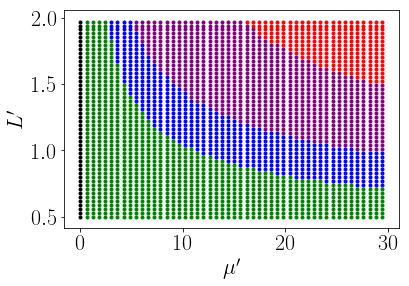

In [93]:
#faz o gráfico L x mu
#Parte 2) Verifique onde as populações sobrevivem e plote!
#USAR FILL_BETWEEN DEPOIS!!!!!!
epsilon = 10E-8
for i in range (0,Nl):
    line_color = []
    for j in range(0,Nmu):
        if Rfinal[i,j] > epsilon:
            if C1final[i,j] > epsilon:
                if C2final[i,j] > epsilon:
                    plt.scatter(MU[j],L[i],marker = '.',color = 'purple') #coexistência
                else:
                    plt.scatter(MU[j],L[i],marker = '.',color = 'blue')
            elif C2final[i,j] > epsilon:
                plt.scatter(MU[j],L[i],marker = '.',color = 'red')
            else:
                plt.scatter(MU[j],L[i],marker = '.',color = 'green')
        else:
            plt.scatter(MU[j],L[i],marker = '.',color = 'black')

            
plt.xlabel(r"$\mu'$")
plt.ylabel(r"$L'$")